# Tutorial de Sympy
https://docs.sympy.org/latest/tutorial/index.html

## Symbolic computation

In [10]:
import sympy 
a = sympy.sqrt(9)
print(type(a) )
a

<class 'sympy.core.numbers.Integer'>


3

In [11]:
a = sympy.sqrt(2)
print(type(a) )
a

<class 'sympy.core.power.Pow'>


sqrt(2)

In [12]:
a = sympy.sqrt(8)
print(type(a) )
a

<class 'sympy.core.mul.Mul'>


2*sqrt(2)

In [13]:
a = sympy.sqrt(2.25)
print(type(a) )
a

<class 'sympy.core.numbers.Float'>


1.50000000000000

## Symbolic expressions

In [15]:
from sympy import symbols 
x,y = symbols('x y')
expr = x + 2*y
print( type(x), type(expr))
expr

<class 'sympy.core.symbol.Symbol'> <class 'sympy.core.add.Add'>


x + 2*y

In [16]:
x*expr

x*(x + 2*y)

In [18]:
from sympy import expand, factor
expanded_expr = expand(x*expr)
expanded_expr

x**2 + 2*x*y

In [19]:
factor(expanded_expr)

x*(x + 2*y)

### Numbered symbols

In [142]:
syms = symbols('a0:5')
syms

In [144]:
type(syms)

tuple

## More

In [41]:
from sympy import *

En teoria lo siguiente hace que se impriman lindo los caracteres, pero eso ya se esta haciendo por defecto... creo

In [23]:
init_printing(use_unicode=True) # esto no se bien que hace 

### Derivada

In [24]:
diff( sin(x)*exp(x), x ) # derivada

### Integral

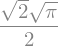

In [25]:
integrate( sin(x**2), (x, -oo, oo))

### Limite

In [28]:
limit( sin(x)/x, x, 0)

### Resolver ecuacion: x\**2 - 2 = x

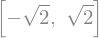

In [29]:
solve( x**2 - 2, x)

### Resolver ecuacion diferencial: y'' - y = e^t

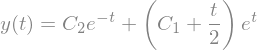

In [31]:
y = Function('y')
t = symbols('t')
dsolve(Eq(y(t).diff(t,t) - y(t), exp(t)), y(t))

### Encontrar autovalores

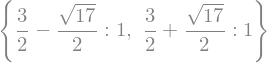

In [98]:
ev = Matrix( [[1, 2], [2, 2]] ).eigenvals()
ev

In [99]:
type(ev)

dict

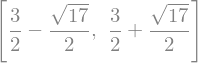

In [102]:
list(ev.keys())

### LaTeX

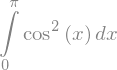

In [39]:
Integral(cos(x)**2, (x,0,pi))

In [37]:
latex(Integral(cos(x)**2, (x,0,pi)))

'\\int\\limits_{0}^{\\pi} \\cos^{2}{\\left(x \\right)}\\, dx'

In [38]:
print( latex(Integral(cos(x)**2, (x,0,pi))) )

\int\limits_{0}^{\pi} \cos^{2}{\left(x \right)}\, dx


## Basic Operations

### Substitution

In [47]:
x,y,z = symbols('x, y, z')
f = cos(x) + 1
f.subs(x, y)

In [50]:
f.subs(x,0)

In [51]:
f = x + y
f.subs([(x,x**2),(y,5)])

### Sympify

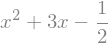

In [52]:
s = 'x**2 +3*x - 1/2'
f = sympify(s)
f

### Evaluate into floating point number

In [56]:
f.subs(x,2)

In [62]:
f.subs(x,2).evalf() # esta forma puede ser inestable

In [63]:
f.evalf(subs={x: 2}) # esta forma es mejor y mas eficiente

In [60]:
pi.evalf()

In [61]:
pi.evalf(100)

### Lambdify
Sirve para convertir una expresion en una funcion de python (mucho mas rapido de calcular)

In [64]:
import numpy as np 
a = np.arange(10) 
f = sin(x) 
f = lambdify( x, f, 'numpy' )
f(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [65]:
f

<function _lambdifygenerated(x)>

### Simplify

In [68]:
f = sin(x)**2 + cos(x)**2
f

In [69]:
simplify(f)

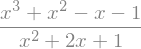

In [70]:
f = (x**3 + x**2 - x - 1) / (x**2 + 2*x +1)
f

In [71]:
simplify(f)

### Expand

In [72]:
expand( (x+1)**2 )

### Factor

In [74]:
factor( x**3 - x**2 + x - 1 )

In [76]:
f = x**2*z + 4*x*y*z + 4*y**2*z
factor( f )

In [77]:
factor_list( f )

### Collect

In [79]:
f = x*y + x - 3 + 2*x**2 - z*x**2 + x**3 
f

In [81]:
c = collect(f, x) # collects common powers of a term in an expression
c

In [82]:
c.coeff(x, 2) # gives the coefficient of x**n in expr

In [83]:
f.coeff(x, 2) # gives the coefficient of x**n in expr

### Cancel 
cancel() will take any rational function and put it into the standard canonical form, p/q

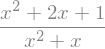

In [86]:
p = x**2 + 2*x + 1
q = x**2  + x
p/q

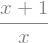

In [87]:
cancel(p/q)

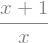

In [90]:
simplify(p/q) # en este caso parece que hace lo mismo simplify

### Apart
apart() performs a partial fraction decomposition on a rational function.

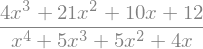

In [91]:
f = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)
f

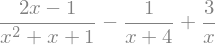

In [92]:
apart(f)

### Trigsimp

Simplify expressions using trigonometric identities

Much like simplify(), trigsimp() applies various trigonometric identities to the input expression, and then uses a heuristic to return the “best” one.

In [93]:
trigsimp(sin(x)**2 + cos(x)**2)

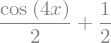

In [94]:
trigsimp(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4)

In [95]:
trigsimp(sin(x)*tan(x)/sec(x))

In [96]:
trigsimp(cosh(x)**2 + sinh(x)**2)

In [97]:
trigsimp(sinh(x)/tanh(x))

### expand_trig
To expand trigonometric functions (apply the sum or double angle identities)

In [103]:
expand_trig( sin(x+y) )

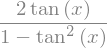

In [104]:
expand_trig( tan(2*x) )

In [106]:
# Notar que trigsimp es como la inversa, ya que acorta las expresiones
trigsimp( sin(x)*cos(y) + sin(y)*cos(x) )

### Powers
 
 Power simplification functions.
 
 Hay que tener cuidado con casos donde no se cumplan ciertas identidades:
 
 ![Identidades de potencia](./sympy_powers_conditions.png "Identidades de potencia")
 
 SymPy will not perform simplifications if they are not true in general.

In [108]:
# Damos algunas suposiciones de base para los symbols
x, y = symbols('x y', positive=True)
a, b = symbols('a b', real=True)
z, t, c = symbols('z t c')

In [112]:
powsimp(x**a * x**b)

In [116]:
powsimp(x**a * y**a)

In [115]:
# Notice that powsimp() refuses to do the simplification if it is not valid.
powsimp(t**c * z**c)

In [117]:
# If you know that you want to apply this simplification, but you don’t want to mess with assumptions, you can pass the force=True flag.
powsimp(t**c * z**c, force=True)

Note that in some instances, in particular, when the exponents are integers or rational numbers, and identity 2 holds, it will be applied automatically.

In [119]:
(z*t)**c # no se cumple siempre

In [118]:
(z*t)**2 # pero aca la aplica igualmente

### expand_power_exp / expand_power_base
Apply identities 1 and 2 from right to left, respectively

In [120]:
expand_power_exp(x**(a+b))

In [122]:
expand_power_base( (x*y)**a )

### powdenest
Apply identity 3 from left to right 

In [123]:
powdenest( (x**a)**b )

In [124]:
powdenest( (z**a)**b ) # No es siempre valida, entonces no se aplica

In [125]:
powdenest( (z**a)**b , force=True ) # se puede forzar

### Exponentials and logarithms
log es el logaritmo natural, tambien se puede usar ln
Two identities:

Neither identity is true for arbitrary complex x and y, due to the branch cut in the complex plane for the complex logarithm. However, sufficient conditions for the identities to hold are if x and y are positive and n is real.

In [127]:
x, y = symbols('x y', positive=True)
n = symbols('n', real=True)

In [129]:
expand_log( log(x*y) )

In [131]:
logcombine( log(x) + log(y) )

## Special functions
SymPy implements dozens of special functions, ranging from functions in combinatorics to mathematical physics.

In [132]:
x, y, z = symbols('x y z')
k, m, n = symbols('k m n')

The factorial function is factorial. factorial(n) represents n!=1⋅2⋯(n−1)⋅n. n! represents the number of permutations of n distinct items.

In [133]:
factorial(n)

The binomial coefficient function is binomial. binomial(n, k) represents (nk), the number of ways to choose k items from a set of n distinct items. It is also often written as nCk, and is pronounced “n choose k”.

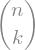

In [134]:
binomial(n,k)

The factorial function is closely related to the gamma function, gamma. gamma(z) represents Γ(z)=∫∞0tz−1e−tdt, which for positive integer z is the same as (z−1)!.

In [135]:
gamma(z)

### Rewrite
A common way to deal with special functions is to rewrite them in terms of one another. This works for any function in SymPy, not just special functions.

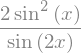

In [136]:
tan(x).rewrite(sin)

In [137]:
factorial(x).rewrite(gamma)

### expand_func

In [138]:
expand_func( gamma(x+3) )

### combsimp
To simplify combinatorial expressions

In [140]:
n, k = symbols('n k', integer = True)
combsimp(factorial(n)/factorial(n - 3))

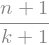

In [141]:
combsimp(binomial(n+1, k+1)/binomial(n, k))